In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from knn import KNN


from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [3]:
female_data = pd.read_csv("ANSUR_II_FEMALE_Public.csv" )
female_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [4]:
male_data = pd.read_csv("ANSUR_II_MALE_Public.csv" , encoding="latin_1")
male_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [5]:
data = pd.concat([female_data,male_data])
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand


In [6]:
data['weightkg'] = data['weightkg']  / 10

data['stature'] = data['stature']  / 10

data['Gender'] = data['Gender'].replace(["Female" , "Male"] , [0,1])

In [7]:
data.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [8]:
data =data.drop(['Date','Installation','Component','Branch' , 'PrimaryMOS','SubjectsBirthLocation','Ethnicity','WritingPreference'] , axis=1 )

In [9]:
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,10037,231,1282,301,204,1180,222,177,373,315,...,942,65.7,152,756,0,2,2,26,61,142
1,10038,194,1379,320,207,1292,225,178,372,272,...,1032,53.4,155,815,0,3,3,21,64,120
2,10042,183,1369,329,233,1271,237,196,397,300,...,1035,66.3,162,799,0,1,1,23,68,147
3,10043,261,1356,306,214,1250,240,188,384,364,...,999,78.2,173,818,0,8,2,22,66,175
4,10051,309,1303,308,214,1210,217,182,378,320,...,911,88.6,152,762,0,1,1,45,63,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,1016,67.5,163,778,1,51,1,22,67,160
4078,29443,247,1473,336,234,1346,253,196,428,374,...,1082,89.6,178,873,1,1,1,22,71,194
4079,29447,264,1394,313,227,1280,245,193,407,367,...,1011,83.2,178,822,1,1,1,23,67,186
4080,29451,203,1417,327,223,1314,250,196,419,365,...,1062,73.1,172,837,1,1,1,22,69,165


What is the effect of K on bias and variance in KNN?
            
        Let's observe its effect. If we consider different values of k, we can observe the trade-off between bias and variance. As k increases, we have a more 
        stable model, i.e., smaller variance, however, the bias is also increased. As k decreases, the bias also decreases, but the model is less stable.

Why Does Increasing k Decrease Variance in kNN?
scores obtained on the different folds?
       
        The lower the value, the higher the bias in the error estimates and the less variance. Conversely, when k is set equal to the number of instances, the error 
        
        estimate is then very low in bias but has the possibility of high variance.

What does a larger value of k in the k fold cross validation imply bias and variance?
Does larger K value implies less variance for K cross-validation?
Why does increasing K decrease variance in KNN?

        When we increase K, the training error will increase (increase bias), but the test error may decrease at the same time (decrease variance). We can think that when K becomes larger, since it has to consider more neighbors, its model is more complex.

What is Correlation Heatmap?


    Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship. Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships. The color-coding of the cells makes it easy to identify relationships between variables at a glance. Correlation heatmaps can be used to find both linear and nonlinear relationships between variables.

In [10]:
#Correlation between different variables
corr = data.corr()
corr

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
SubjectId,1.000000,-0.074702,-0.056287,-0.037505,-0.070446,-0.055057,-0.071510,0.001430,-0.082150,-0.070572,...,-0.044038,-0.066602,-0.101394,-0.037595,-0.082133,0.010501,0.021578,-0.046753,-0.054552,-0.070158
abdominalextensiondepthsitting,-0.074702,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,...,0.162457,0.825714,0.550544,0.389220,0.313676,0.021201,-0.079167,0.380614,0.300027,0.793634
acromialheight,-0.056287,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,...,0.933248,0.684610,0.734622,0.922687,0.626794,-0.002789,-0.235121,0.078582,0.944577,0.702188
acromionradialelength,-0.037505,0.321755,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,...,0.851464,0.603964,0.646149,0.684979,0.544591,0.011185,-0.201095,0.076888,0.831055,0.620289
anklecircumference,-0.070446,0.524747,0.512417,0.424626,1.000000,0.469964,0.711720,0.569457,0.541868,0.643211,...,0.420109,0.745950,0.702178,0.514394,0.397710,-0.015973,-0.158360,-0.025016,0.499770,0.730350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SubjectNumericRace,0.010501,0.021201,-0.002789,0.011185,-0.015973,-0.001554,-0.010784,-0.009037,-0.011861,-0.004081,...,0.004667,0.017597,-0.016068,-0.000558,-0.022229,1.000000,0.017987,0.033750,-0.001742,0.007052
DODRace,0.021578,-0.079167,-0.235121,-0.201095,-0.158360,-0.229070,-0.108116,-0.113672,-0.124767,-0.066587,...,-0.212210,-0.133350,-0.181502,-0.257819,-0.118576,0.017987,1.000000,0.004738,-0.227227,-0.135988
Age,-0.046753,0.380614,0.078582,0.076888,-0.025016,0.040748,0.077855,0.030007,0.068712,0.217227,...,-0.030264,0.228096,0.148806,0.105944,0.065747,0.033750,0.004738,1.000000,0.031826,0.220190
Heightin,-0.054552,0.300027,0.944577,0.831055,0.499770,0.939310,0.691724,0.797004,0.756733,0.510416,...,0.905858,0.636173,0.733900,0.854877,0.660288,-0.001742,-0.227227,0.031826,1.000000,0.659988


<Axes: >

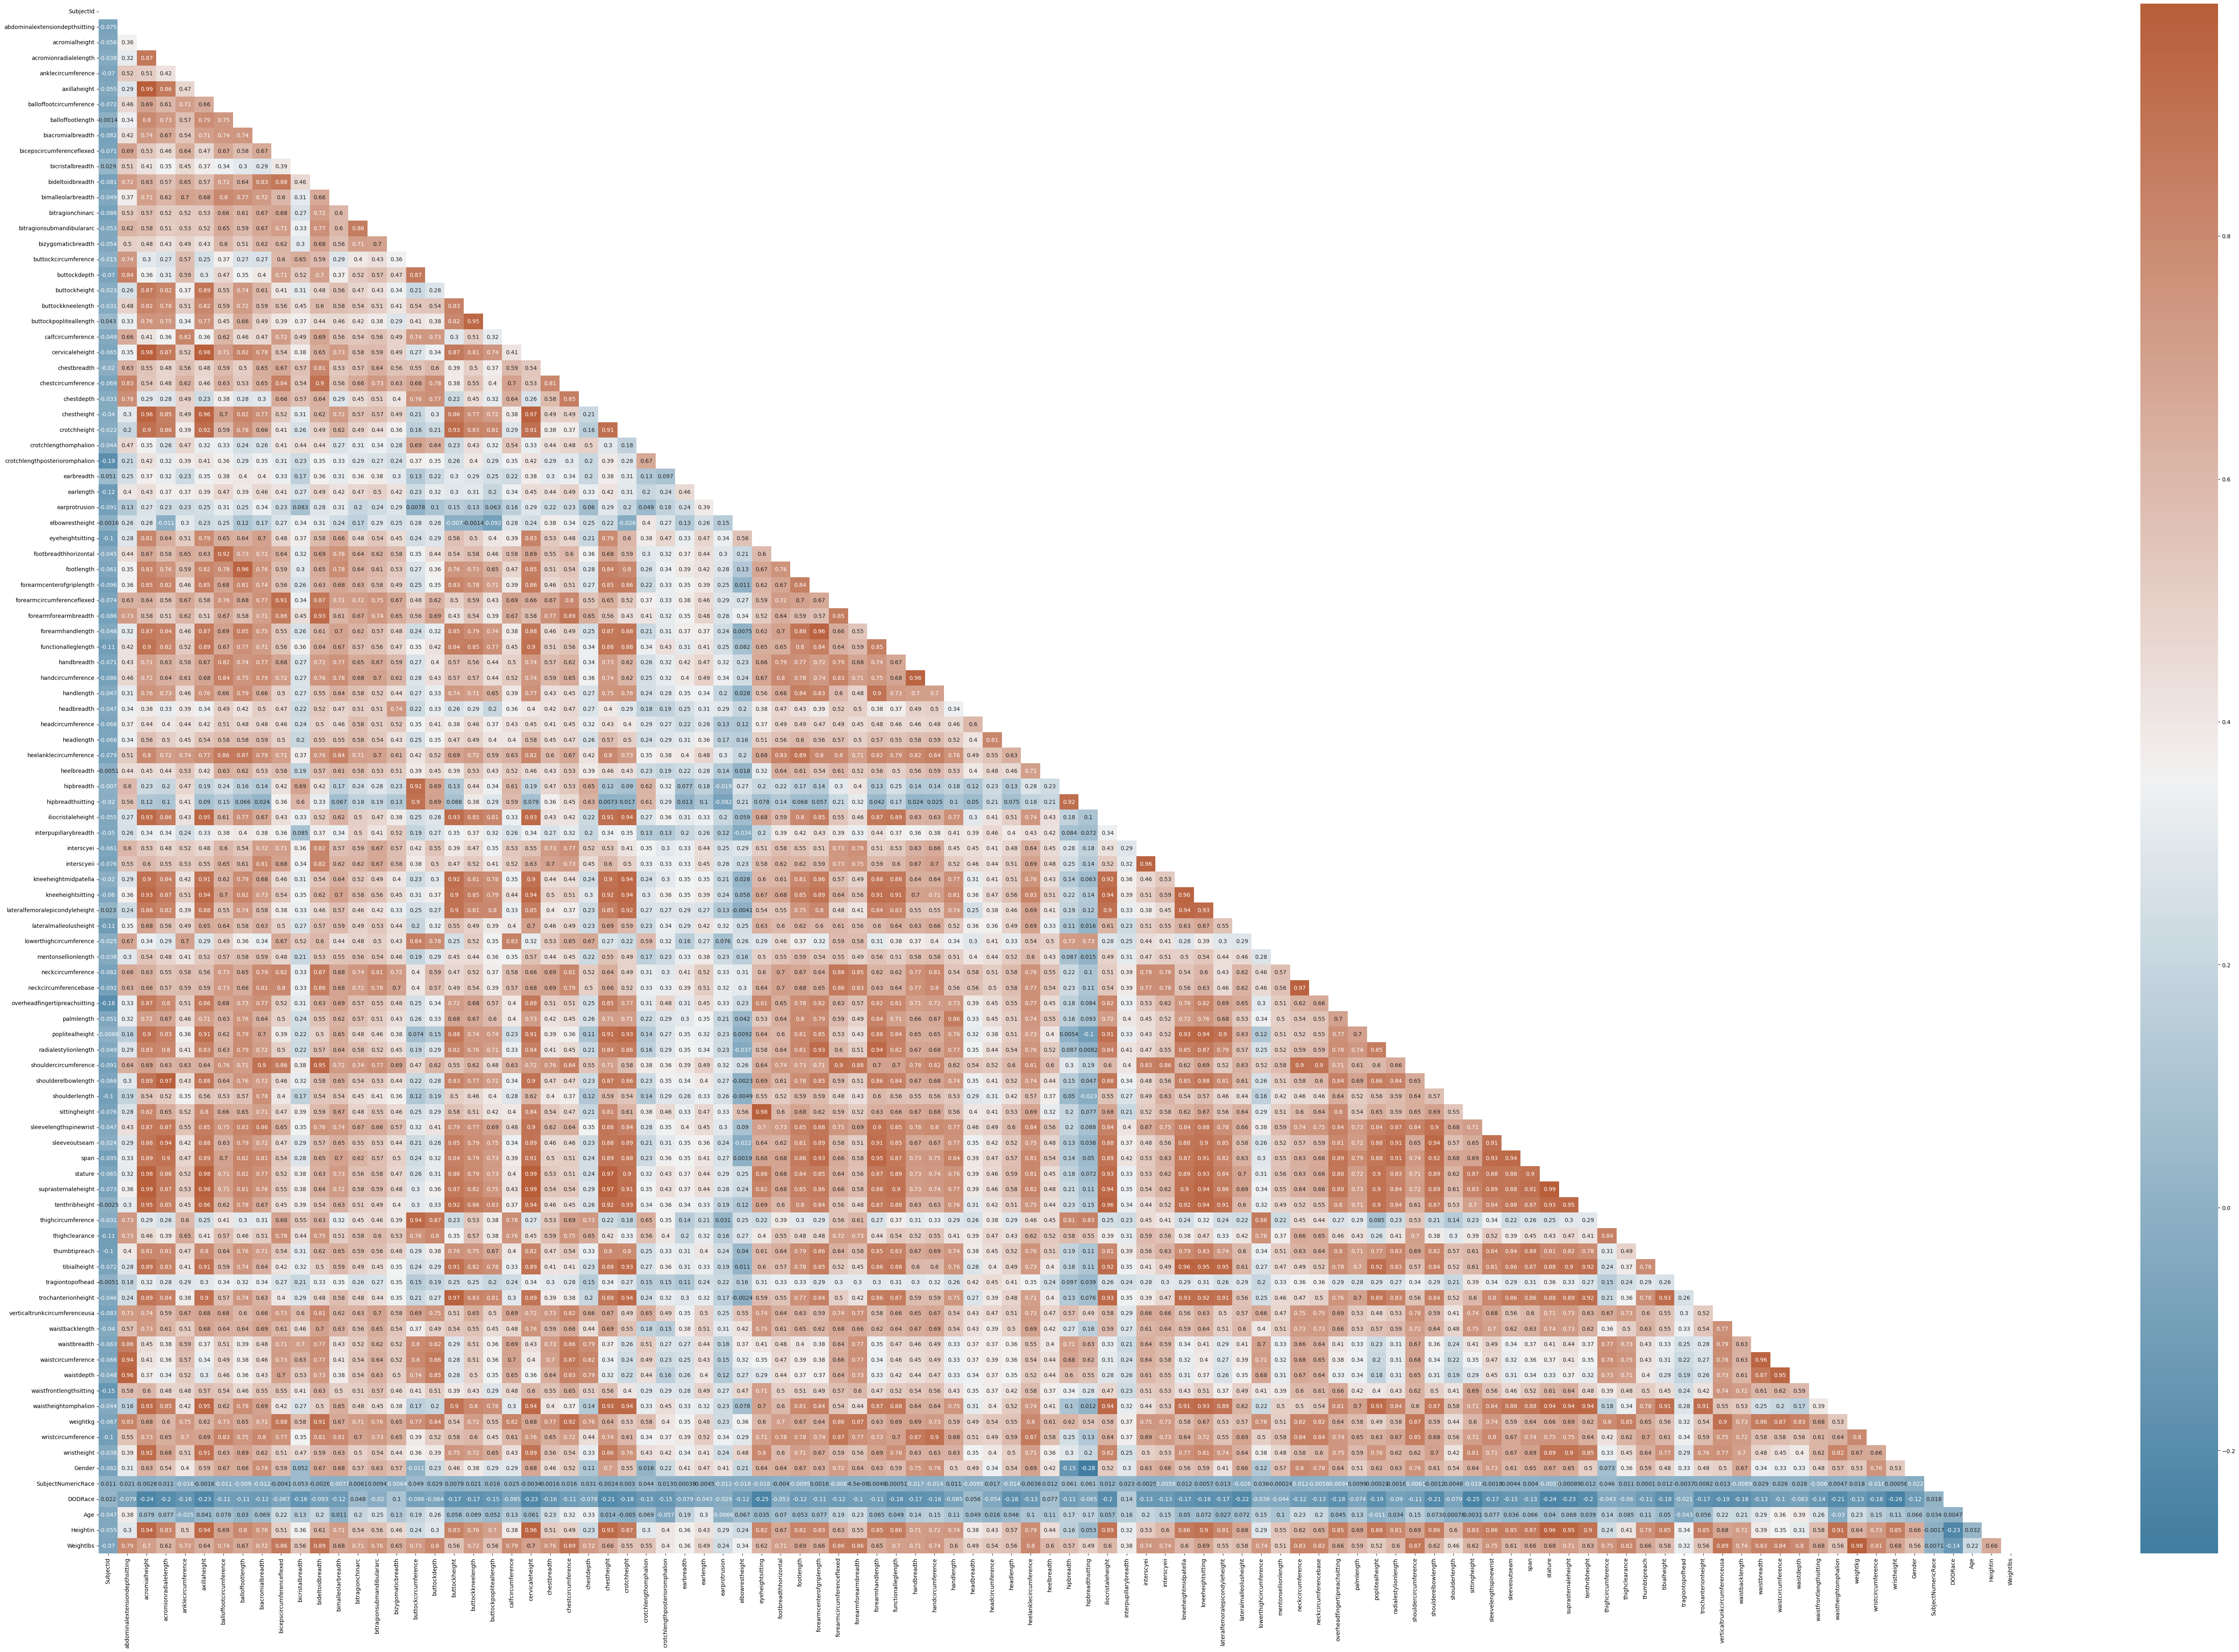

In [11]:
#Set up the matplotlib plot configuration
f,ax = plt.subplots(figsize=(77,50))

#Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr,dtype=bool))

#Configure a custom diverging colormap
cmap = sns.diverging_palette(235,25,as_cmap=True)

#Draw the heatmap
sns.heatmap(corr,annot=True,mask=mask,cmap=cmap)